<a href="https://colab.research.google.com/github/DineshChopra/AI-ML/blob/master/TensorFlow/Coursera/c2_w1_2_CatAndDog_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cat vs Dogs Classification

In [1]:
# Setup
import os
import zipfile
import random
import tensorflow as tf

from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile


In [2]:
!wget --no-check-certificate \
      "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    -O "/tmp/cats-and-dogs.zip"

--2021-04-24 12:10:41--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 173.222.228.51, 2600:1409:3000:4a4::e59, 2600:1409:3000:48e::e59
Connecting to download.microsoft.com (download.microsoft.com)|173.222.228.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.68M   278MB/s    in 2.8s    

2021-04-24 12:10:44 (278 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824894548/824894548]



In [3]:
local_zip = '/tmp/cats-and-dogs.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
print(len(os.listdir('/tmp/PetImages/Cat')))
print(len(os.listdir('/tmp/PetImages/Dog')))

12501
12501


In [5]:
os.mkdir('/tmp/cats-v-dogs')

In [11]:
CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_DIR = "/tmp/cats-v-dogs/training/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"

DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TESTING_DIR = "/tmp/cats-v-dogs/testing/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"

os.mkdir(TRAINING_DIR)
os.mkdir(TRAINING_CATS_DIR)
os.mkdir(TRAINING_DOGS_DIR)

os.mkdir(TESTING_DIR)
os.mkdir(TESTING_CATS_DIR)
os.mkdir(TESTING_DOGS_DIR)


In [12]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
  dataset = []
  for unitData in os.listdir(SOURCE):
    data = SOURCE + unitData

    if (os.path.getsize(data)):
      dataset.append(unitData)
    else:
      print('Skipped data : ', unitData)
      print('Invalid File i.e. zero size')
  # End of for loop

  train_set_length = int(len(dataset) * SPLIT_SIZE)
  test_set_length = int(len(dataset) - train_set_length)
  print('train_set_length : ', train_set_length)
  print('test_set_length : ', test_set_length)

  # Shuffle Data
  random.sample(dataset, len(dataset))
  
  train_set = dataset[0: train_set_length]
  test_set = dataset[-test_set_length:]

  # Copy training dataset
  for unitData in train_set:
      temp_train_set =  SOURCE + unitData
      final_train_set =  TRAINING + unitData
      copyfile(temp_train_set, final_train_set)

  # Copy testing dataset
  for unitdata in test_set:
    temp_test_set = SOURCE + unitdata
    final_test_set = TESTING + unitdata
    copyfile(temp_test_set, final_test_set)


In [13]:
split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

Skipped data :  666.jpg
Invalid File i.e. zero size
train_set_length :  11250
test_set_length :  1250
Skipped data :  11702.jpg
Invalid File i.e. zero size
train_set_length :  11250
test_set_length :  1250


In [15]:
# Print image counts
print(len(os.listdir(TRAINING_CATS_DIR)))
print(len(os.listdir(TRAINING_DOGS_DIR)))
print(len(os.listdir(TESTING_CATS_DIR)))
print(len(os.listdir(TESTING_DOGS_DIR)))

11250
11250
1250
1250


In [16]:
# DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
# USE AT LEAST 3 CONVOLUTION LAYERS
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(300, 300, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size = (300, 300),
    batch_size = 100,
    class_mode = "binary",
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    TESTING_DIR,
    target_size = (300, 300),
    batch_size = 100,
    class_mode = "binary",
)

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [24]:
history = model.fit_generator(train_generator,
                              steps_per_epoch = 224,
                              validation_data=train_generator, 
                              validation_steps = 25,
                              epochs=2,
                              verbose=1 )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/2
 47/224 [=====>........................] - ETA: 1:24 - loss: 0.3974 - accuracy: 0.8219

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

224/224 [==============================] - 114s 510ms/step - loss: 0.3949 - accuracy: 0.8189 - val_loss: 0.3300 - val_accuracy: 0.8632
Epoch 2/2
224/224 [==============================] - 115s 514ms/step - loss: 0.3196 - accuracy: 0.8607 - val_loss: 0.1982 - val_accuracy: 0.9320


<Figure size 432x288 with 0 Axes>

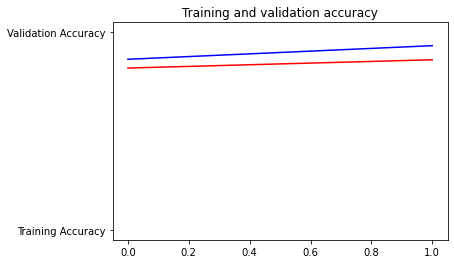

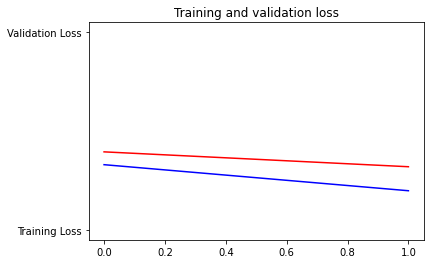

<Figure size 432x288 with 0 Axes>

In [25]:
# Plot loss and accuracy

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Plot accuracy and epochs
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

# Plot loss and epochs
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.title('Training and validation loss')
plt.figure()